# HPE Analysis

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib as mpl 
#mpl.use('agg')
import matplotlib.pyplot as plt
import datetime
import math
import scipy as sc
from scipy import stats
#from calcIndFish import calcDisDetU
from datetime import datetime
from datetime import timedelta
from IPython.display import Image
import pylab
import matplotlib.cm as cm


In [2]:
refTags = list(['R1','R2','R3'])
syncTags = list(['S7','S8','S10','S12','S13','S14','S15','S16','S17','S18'])
IDlist = refTags + syncTags

In [3]:
dataRefSync = {}
for tagID in IDlist:
    filename = '/Users/jennavergeynst/Documents/DataHam/VPS/VPS-INBO-01-Results20160304/Positions/TRANSMITTER-'+tagID+'-CALC-POSITIONS.csv'
    temp = pd.read_csv(filename)
    temp['DATETIME'] = pd.to_datetime(temp['DATETIME'])
    dataRefSync[tagID] = temp
    
dataRefSync = pd.concat(dataRefSync, axis = 1)

## Overview HPEs of all eel detections

Colorscale: **yellow to red** for **low to high** HPE

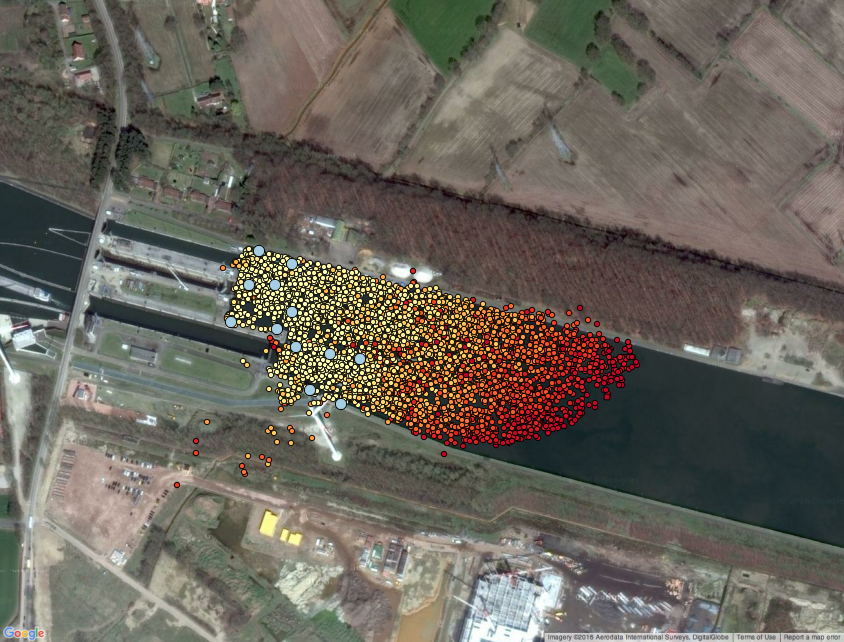

In [16]:
Image("/Users/jennavergeynst/Documents/Analysis/QGis visualisaties/AllHPEs.png")

**COMMENT**
Algemeen overzicht logisch: een grotere 'error sensitivity' buiten de receiver array dan erbinnen.
Eveneens een grote HPE in betonnen hoekje.
Helaas soms een lage HPE op onmogelijke locaties (buiten het water).

## Compare some statistics and figures

**HPEm [m]**
A horizontal distance between a synthesised position and the known location of the transmitter (gps measurement) (given for ref/sync tags)

**HPE [-]** 
The error sensitivity of a synthesised position (provided for ref/sync tags and animals to users)

HPE is derived by applying knowledge of measured error from fixed locations, to the sensitivity, by use of a linear transformation:

\begin{equation}
HPE = A * HPE_s+B
\end{equation}

with *HPEs* a weighted average of the valid basic positions for the transmission, based on *HPEb*.
*HPEb* is the basic position error sensitivity, calculated by injection error in the range differences and depth used to calculate the position, so calculating a set of 'errored' positions. *HPEb* is then the largest horizontal difference between the basic position and the errored positions.

**Derivation of the linear transformation function for HPE:**
group all basic ref/synctag transmitters (with known positions) based on HPEb, within bins of size 1
for each bin:
X = average HPEb from the bin
Y = 2DRMS (based on stdev) of the calculated positions from the bin
N = number of calculated positions
linear regression of (X,Y) points using N as weight

HPE may significantly under- or overestimate the actual error!
Interpretation: relative unitless estimate of error sensitivity

**In this section:**

- tables with statistics of HPE and HPEm for each reference and sync tag
- for each reference tag:
    - air pictures comparing HPE and HPEm
    - figures of the evolution of HPE and HPEm in time
    - scatterplots of HPE and HPEm
- for some synctags: air pictures comparing HPE and HPEm

In [5]:
dataRefSync.loc[:, (slice(None), 'HPE')].describe()

R1           R2           R3          S10          S12  \
               HPE          HPE          HPE          HPE          HPE   
count  7983.000000  8197.000000  7907.000000  7708.000000  7600.000000   
mean      1.702956     2.013664     2.308221     1.977128     6.641658   
std       0.128270     5.688344    11.630602     0.765382    81.716792   
min       1.600000     1.700000     1.600000     1.700000     2.000000   
25%       1.700000     1.800000     1.700000     1.800000     2.600000   
50%       1.700000     1.800000     1.700000     1.800000     2.800000   
75%       1.700000     1.800000     2.300000     1.900000     3.000000   
max      10.100000   446.300000   769.400000    27.500000  4522.000000   

                S13          S14          S15          S16            S17  \
                HPE          HPE          HPE          HPE            HPE   
count   7801.000000  7891.000000  7726.000000  7930.000000    7130.000000   
mean      23.506384     2.497440     3.412581     1.767654      95.324741   
std      701.577227     8.481694     1.158919     0.361917    4183.619757   
min        1.900000     1.900000     2.000000     1.700000       2.200000   
25%        2.300000     2.000000     3.000000     1.700000       3.000000   
50%        4.100000     2.000000     3.300000     1.700000       3.100000   
75%        4.800000     2.100000     3.700000     1.800000       3.200000   
max    59757.300000   386.100000    73.300000    24.300000  274303.900000   

               S18           S7           S8  
               HPE          HPE          HPE  
count  8076.000000  7227.000000  7989.000000  
mean      1.805535     4.080061     1.870635  
std       1.225955     3.554346     2.483353  
min       1.700000     1.800000     1.700000  
25%       1.700000     2.100000     1.700000  
50%       1.700000     2.300000     1.700000  
75%       1.800000     2.700000     1.700000  
max      68.000000    51.600000   105.200000

In [6]:
dataRefSync.loc[:, (slice(None), 'HPEm')].describe()

R1           R2           R3          S10          S12  \
              HPEm         HPEm         HPEm         HPEm         HPEm   
count  7958.000000  8197.000000  7905.000000  7708.000000  7600.000000   
mean      1.120093     1.090143     5.950310     4.000376     9.764237   
std       1.286035     4.643884     9.550833     6.760660    15.625609   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.500000     0.500000     0.800000     1.100000     1.600000   
50%       1.000000     0.700000     1.300000     1.600000     2.700000   
75%       1.400000     1.000000     4.000000     5.100000    11.700000   
max      39.100000   111.600000    91.400000    92.100000   135.300000   

               S13          S14          S15          S16          S17  \
              HPEm         HPEm         HPEm         HPEm         HPEm   
count  7801.000000  7891.000000  7726.000000  7930.000000  7130.000000   
mean      6.654365     1.182043    10.671356     2.970391     2.721262   
std      10.257674     1.568217    12.554283     2.655242     4.082697   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.600000     1.200000     1.300000     1.100000   
50%       2.400000     0.900000     7.600000     2.000000     2.100000   
75%       6.900000     1.400000    16.600000     4.900000     3.000000   
max     138.500000    84.700000   111.500000    47.000000   102.100000   

               S18           S7           S8  
              HPEm         HPEm         HPEm  
count  8076.000000  7227.000000  7989.000000  
mean      1.073725    20.900996     0.584716  
std       2.716173    20.909207     0.984493  
min       0.000000     0.000000     0.000000  
25%       0.500000     1.100000     0.200000  
50%       0.900000    12.400000     0.400000  
75%       1.200000    43.800000     0.800000  
max     109.500000   130.900000    33.400000

**COMMENT**
Hoe kan de 'absolute' fout tussen de berekende (synthesized) positie en de gps-locatie soms zo groot zijn? Voor R3 bvb gemiddeld 6m, voor S7 gemiddeld 21 m!

In [7]:
def HPEfigs (refTagData):
    """
    Function to plot the figures for analysing HPE: Evolution of HPE in time, evolution of HPEm in time
    and scatterplot of HPEm vs HPE.
    Input: dataframe of reference tags
    """
    fig = plt.figure(figsize=(14,5))
    plt.plot(refTagData['DATETIME'], refTagData['HPE'])
    plt.ylabel('HPE [-]')
    #plt.savefig('figures/HPE '+refTagData)   
    fig = plt.figure(figsize=(14,5))
    plt.plot(refTagData['DATETIME'], refTagData['HPEm'])
    plt.ylabel('HPEm [m]')
    #plt.legend()
    #plt.savefig('figures/HPEm '+refTagData)
    fig = plt.figure()
    plt.scatter(refTagData['HPE'], refTagData['HPEm'])
    plt.xlabel('HPE [-]')
    plt.ylabel('HPEm [m]')
    #plt.savefig('figures/Scatter '+refTagData+'.png')
    
    return

**HPE and HPEm of R1**

<IPython.core.display.Javascript object>


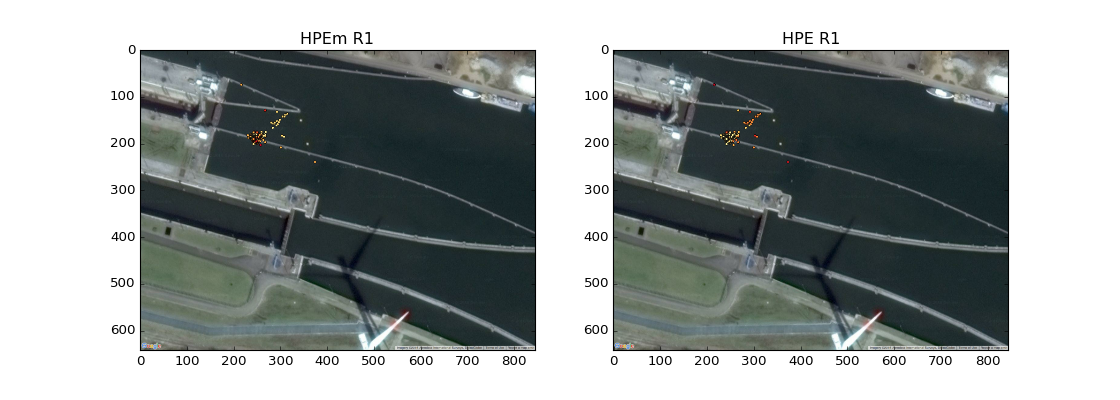

In [8]:
import matplotlib.image as mpimg
fig = plt.figure(figsize=(14,5))
a = fig.add_subplot(1,2,1)
img = mpimg.imread("/Users/jennavergeynst/Documents/Analysis/QGis visualisaties/HPEmR1.png")
imgplot = plt.imshow(img)
a.set_title('HPEm R1')
a = fig.add_subplot(1,2,2)
img = mpimg.imread("/Users/jennavergeynst/Documents/Analysis/QGis visualisaties/HPE_R1.png")
imgplot = plt.imshow(img)
a.set_title('HPE R1')
plt.show()

**COMMENT**
Dit is misschien duidelijker te zien op QGIS zelf, waar je kan inzoemen...

<IPython.core.display.Javascript object>


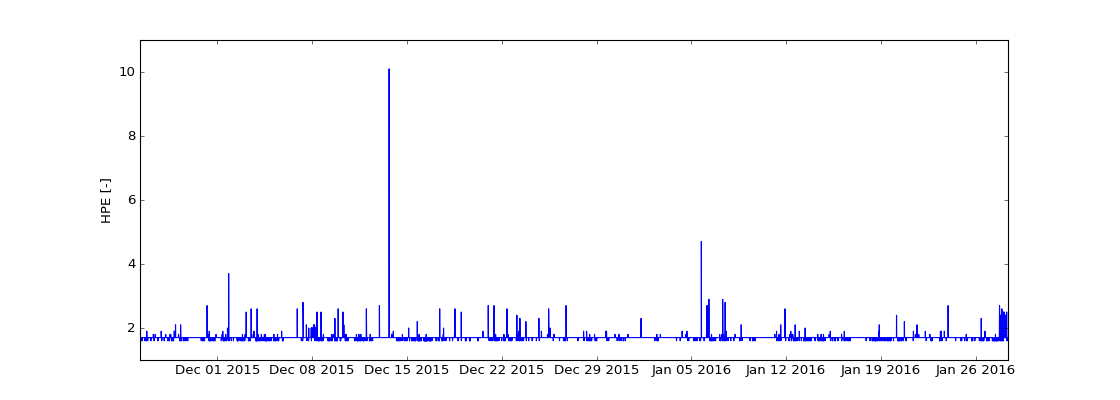

<IPython.core.display.Javascript object>


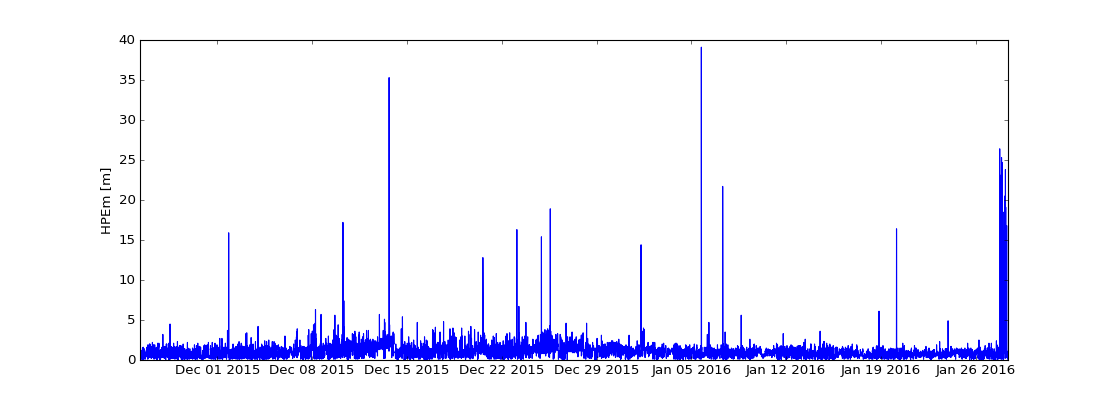

<IPython.core.display.Javascript object>


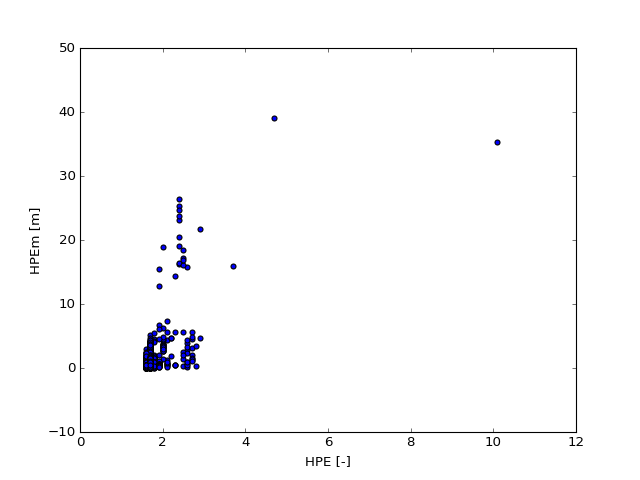

In [9]:
HPEfigs(dataRefSync['R1'])

**COMMENT**
Weinig verband tussen HPE en HPEm, soms heel grote pieken, in het algemeen veel ruis

**HPE and HPEm of R2**

<IPython.core.display.Javascript object>


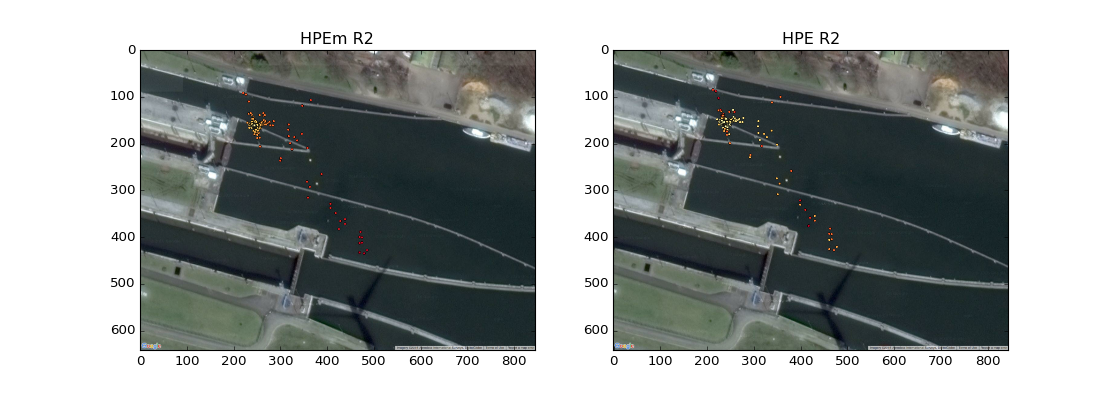

In [10]:
import matplotlib.image as mpimg
fig = plt.figure(figsize=(14,5))
a = fig.add_subplot(1,2,1)
img = mpimg.imread("/Users/jennavergeynst/Documents/Analysis/QGis visualisaties/HPEmR2.png")
imgplot = plt.imshow(img)
a.set_title('HPEm R2')
a = fig.add_subplot(1,2,2)
img = mpimg.imread("/Users/jennavergeynst/Documents/Analysis/QGis visualisaties/HPE_R2.png")
imgplot = plt.imshow(img)
a.set_title('HPE R2')
plt.show()

**COMMENT**
HPEm lijkt me logisch: grotere fout (roder) verder weg van de werkelijke tagpositie. De HPE is echter minder logisch, geen rechtstreeks verband tussen de afstand tot de werkelijke positie en de error sensitivity.
Bedenking: er is ook niet echt een verband: de error sensitivity hangt af van de locatie in de receiver array...

<IPython.core.display.Javascript object>


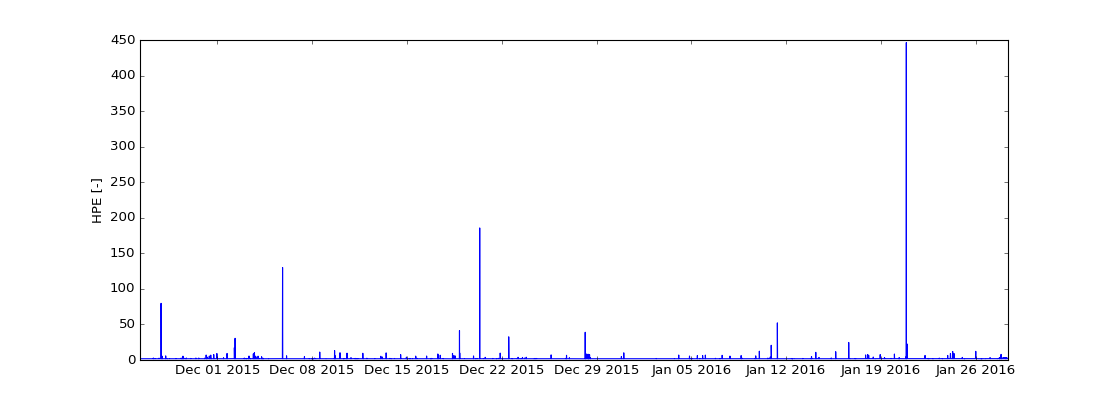

<IPython.core.display.Javascript object>


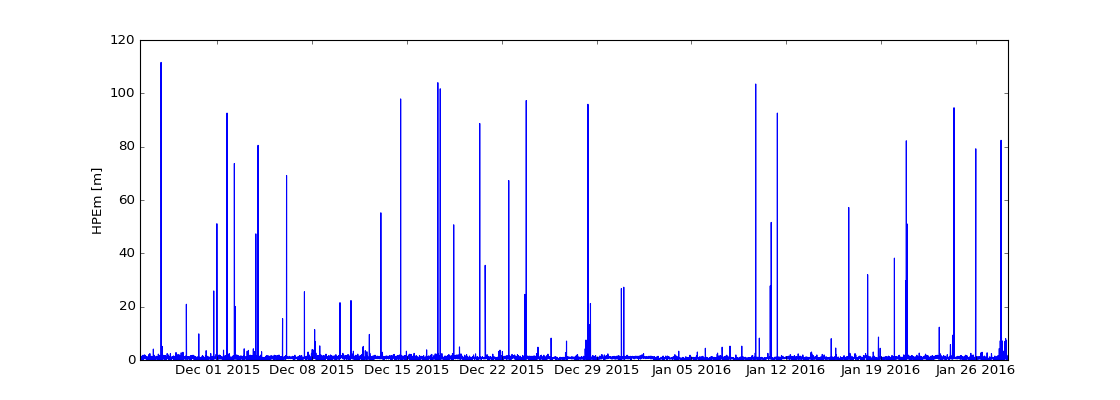

<IPython.core.display.Javascript object>


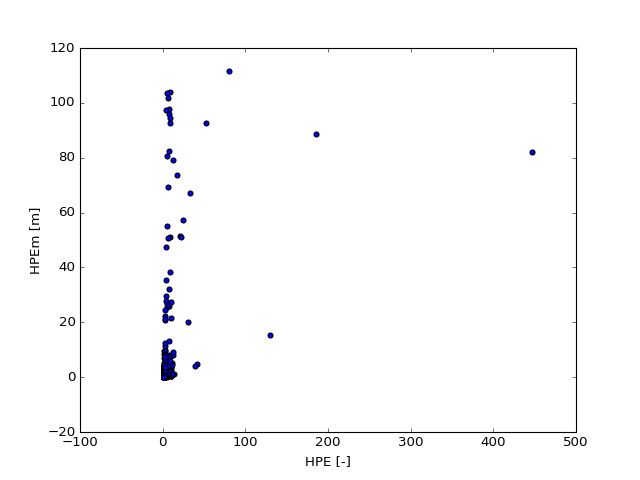

In [11]:
HPEfigs(dataRefSync['R2'])

**HPE and HPEm of R3**

<IPython.core.display.Javascript object>


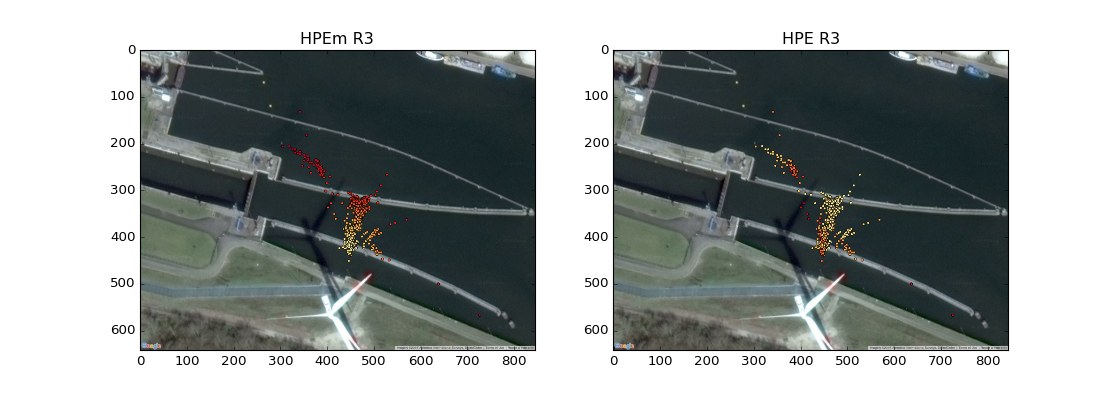

In [12]:
import matplotlib.image as mpimg
fig = plt.figure(figsize=(14,5))
a = fig.add_subplot(1,2,1)
img = mpimg.imread("/Users/jennavergeynst/Documents/Analysis/QGis visualisaties/HPEmR3.png")
imgplot = plt.imshow(img)
a.set_title('HPEm R3')
a = fig.add_subplot(1,2,2)
img = mpimg.imread("/Users/jennavergeynst/Documents/Analysis/QGis visualisaties/HPE_R3.png")
imgplot = plt.imshow(img)
a.set_title('HPE R3')
plt.show()

**COMMENT**
Heel raar afwijkingspatroon van berekende posities tov de werkelijke positie...

<IPython.core.display.Javascript object>


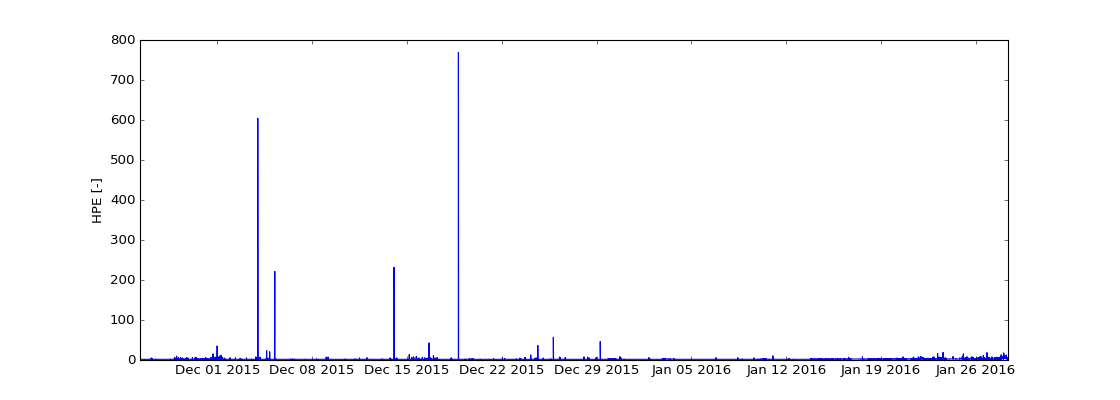

<IPython.core.display.Javascript object>


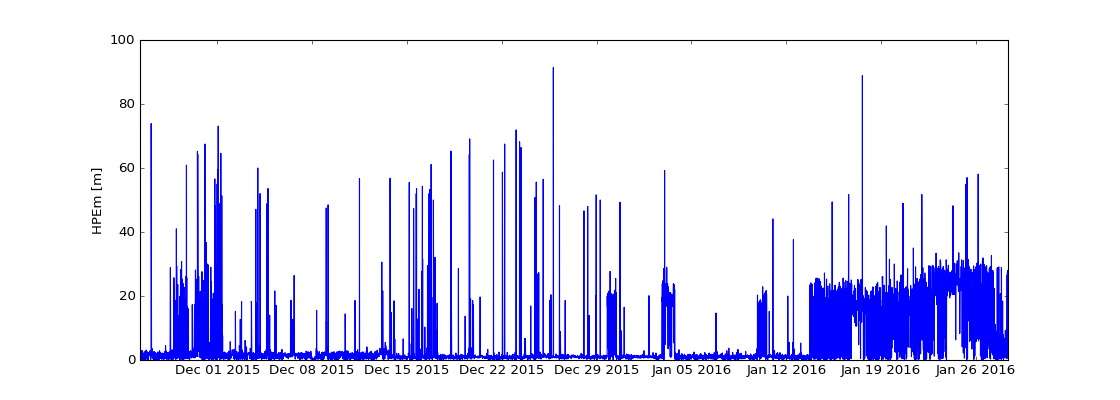

<IPython.core.display.Javascript object>


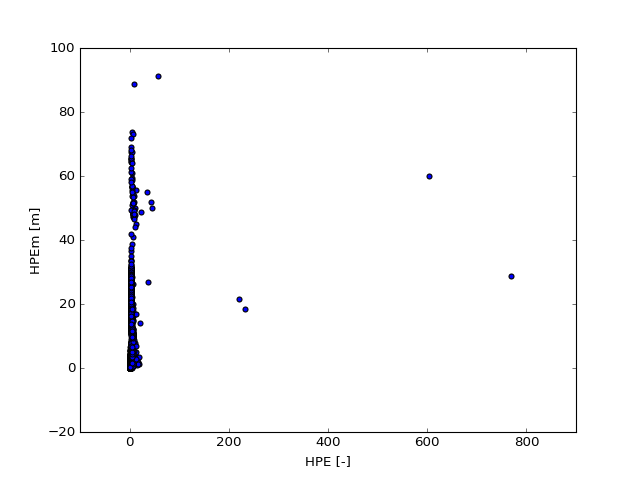

In [13]:
HPEfigs(dataRefSync['R3'])

<IPython.core.display.Javascript object>


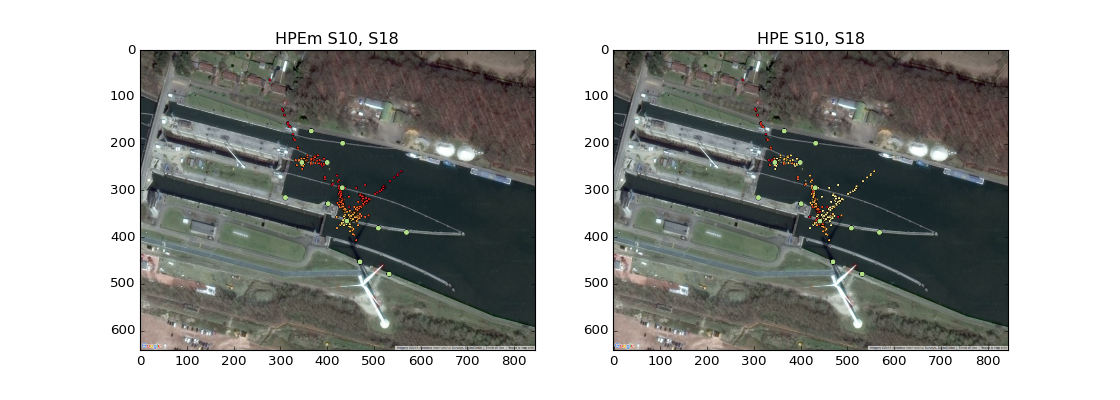

In [14]:
import matplotlib.image as mpimg
fig = plt.figure(figsize=(14,5))
a = fig.add_subplot(1,2,1)
img = mpimg.imread("/Users/jennavergeynst/Documents/Analysis/QGis visualisaties/HPEmS10-18.png")
imgplot = plt.imshow(img)
a.set_title('HPEm S10, S18')
a = fig.add_subplot(1,2,2)
img = mpimg.imread("/Users/jennavergeynst/Documents/Analysis/QGis visualisaties/HPE_S10-18.png")
imgplot = plt.imshow(img)
a.set_title('HPE S10, S18')
plt.show()

**COMMENT**
Opnieuw vreemde patronen...

<IPython.core.display.Javascript object>


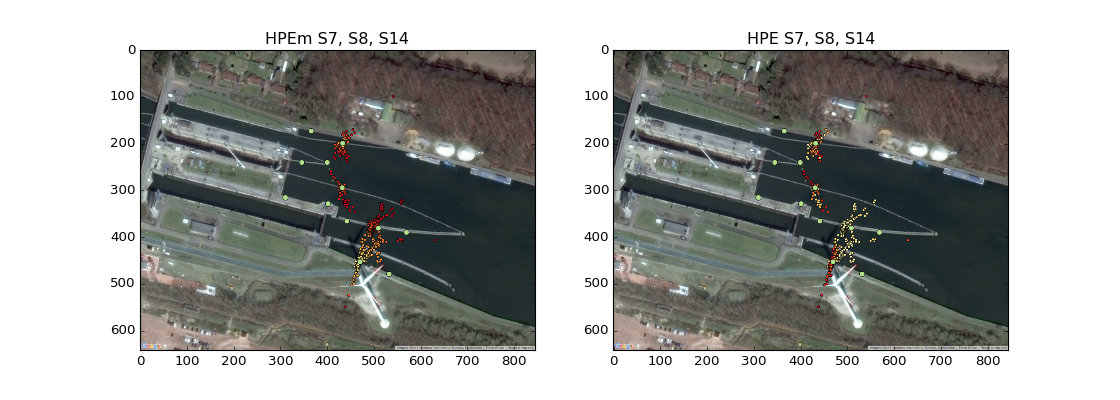

In [15]:
import matplotlib.image as mpimg
fig = plt.figure(figsize=(14,5))
a = fig.add_subplot(1,2,1)
img = mpimg.imread("/Users/jennavergeynst/Documents/Analysis/QGis visualisaties/HPEmS7-8-14.png")
imgplot = plt.imshow(img)
a.set_title('HPEm S7, S8, S14')
a = fig.add_subplot(1,2,2)
img = mpimg.imread("/Users/jennavergeynst/Documents/Analysis/QGis visualisaties/HPE_S7-8-14.png")
imgplot = plt.imshow(img)
a.set_title('HPE S7, S8, S14')
plt.show()